In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [3]:
df.shape

(9994, 11)

In [4]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [7]:
df['Order Date'].isnull().sum()

np.int64(5952)

In [8]:
df = df.dropna(subset=['Order Date'])

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])  # removes bad dates

df['Year'] = df['Order Date'].dt.year
df['Month Number'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.strftime('%B')


In [15]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month Number,Month Name
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,11,November
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,11,November
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017,6,June
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016,10,October
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016,10,October


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4042 entries, 0 to 9991
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4042 non-null   object        
 1   Customer Name  4042 non-null   object        
 2   Category       4042 non-null   object        
 3   Sub Category   4042 non-null   object        
 4   City           4042 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         4042 non-null   object        
 7   Sales          4042 non-null   int64         
 8   Discount       4042 non-null   float64       
 9   Profit         4042 non-null   float64       
 10  State          4042 non-null   object        
 11  Year           4042 non-null   int32         
 12  Month Number   4042 non-null   int32         
 13  Month Name     4042 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(8)
memory usage:

In [17]:
###Total Sales###
total_sales = df['Sales'].sum()
total_sales

np.int64(6053500)

In [19]:
###Total Profit###
total_profit = df['Profit'].sum()
total_profit

np.float64(1503059.03)

In [20]:
###Total Orders###
total_orders = df['Order ID'].nunique()
total_orders

4042

In [22]:
###Profit Margin###
profit_margin = (total_profit / total_sales) * 100
profit_margin

np.float64(24.82958668538862)

In [23]:
print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")
print(f"Total Orders: {total_orders}")
print(f"Profit Margin: {profit_margin:.2f}%")

Total Sales: 6053500
Total Profit: 1503059.03
Total Orders: 4042
Profit Margin: 24.83%


In [25]:
### Which category has the highest sales? ###

category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

,Sales
Category,
"Eggs, Meat & Fish",948304
Snacks,910849
Fruits & Veggies,877861
Bakery,869538
Food Grains,833326
Oil & Masala,833099
Beverages,780523


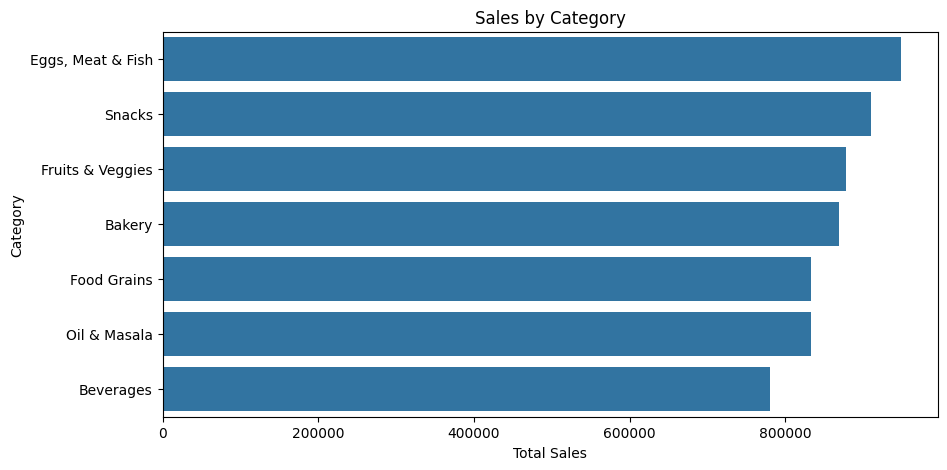

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

In [29]:
### Which categories make the most profit? ###
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit

,Profit
Category,
"Eggs, Meat & Fish",234050.78
Snacks,232451.25
Fruits & Veggies,221754.77
Bakery,212309.89
Food Grains,207840.63
Oil & Masala,205029.13
Beverages,189622.58


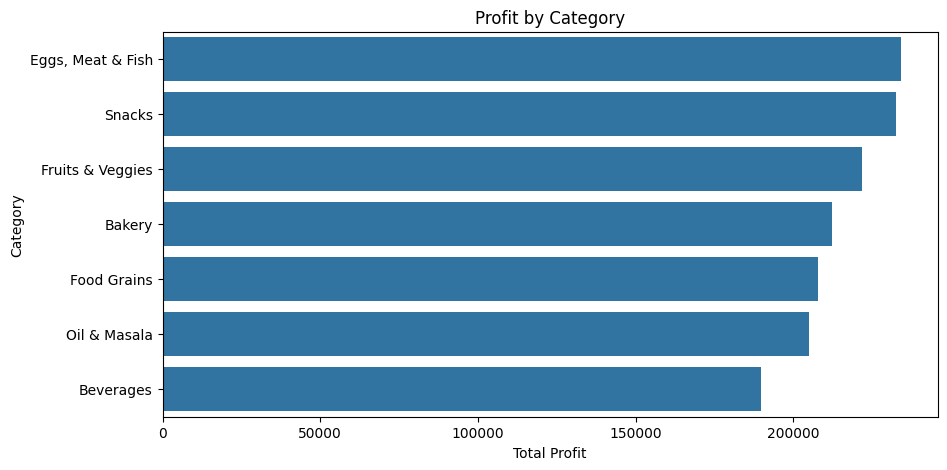

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x=category_profit.values, y=category_profit.index)
plt.title('Profit by Category')
plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.show()

In [31]:
### Which cities generate the most revenue? ###
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales.head(10)

,Sales
City,
Vellore,307084
Coimbatore,285737
Bodi,284035
Kanyakumari,280434
Tirunelveli,276741
Tenkasi,275327
Pudukottai,272929
Krishnagiri,266667
Salem,265833


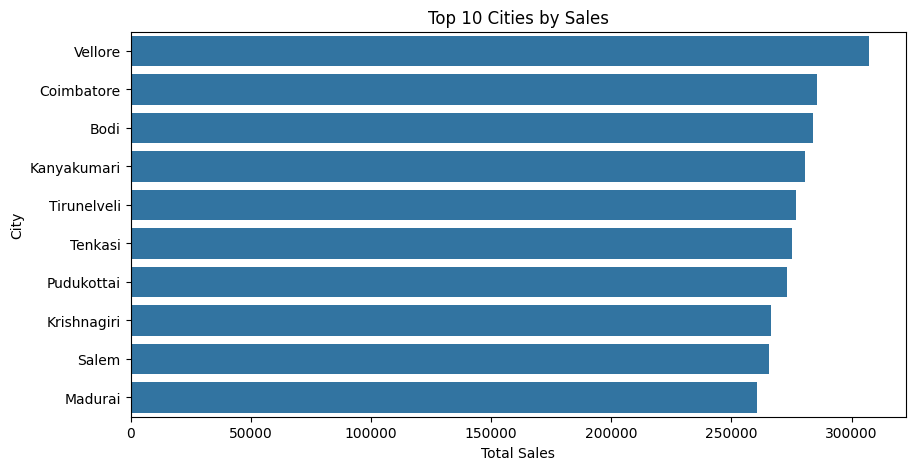

In [32]:
top_10_cities = city_sales.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

In [34]:
### How do sales change over time? ###
monthly_sales = df.groupby('Month Number')['Sales'].sum().reset_index()
monthly_sales

,Month Number,Sales
0,1,175986
1,2,196874
2,3,371201
3,4,421442
4,5,390694
5,6,450453
6,7,412349
7,8,361569
8,9,884991
9,10,455396


In [35]:
month_names = df[['Month Number', 'Month Name']].drop_duplicates().sort_values('Month Number')
monthly_sales = monthly_sales.merge(month_names, on='Month Number')
monthly_sales

,Month Number,Sales,Month Name
0,1,175986,January
1,2,196874,February
2,3,371201,March
3,4,421442,April
4,5,390694,May
5,6,450453,June
6,7,412349,July
7,8,361569,August
8,9,884991,September
9,10,455396,October


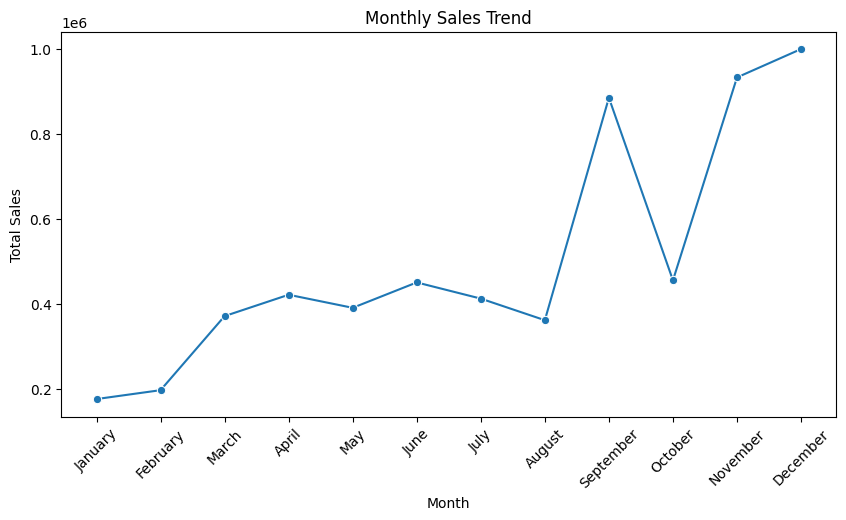

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month Name', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

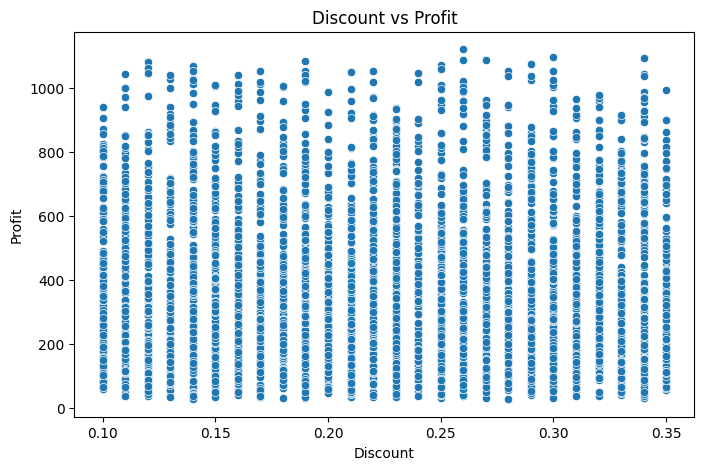

In [37]:
### Do discounts actually increase profit or reduce it? ###
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

In [38]:
df[['Discount', 'Profit']].corr()

,Discount,Profit
Discount,1.00000,-0.01931
Profit,-0.01931,1.00000


In [39]:
### Which variables are related to each other? ###
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()

,Sales,Discount,Profit
0,1254,0.12,401.28
1,749,0.18,149.80
2,2360,0.21,165.20
3,896,0.25,89.60
4,2355,0.26,918.45


In [40]:
corr_matrix = numeric_df.corr()
corr_matrix

,Sales,Discount,Profit
Sales,1.000000,-0.017099,0.604189
Discount,-0.017099,1.000000,-0.019310
Profit,0.604189,-0.019310,1.000000


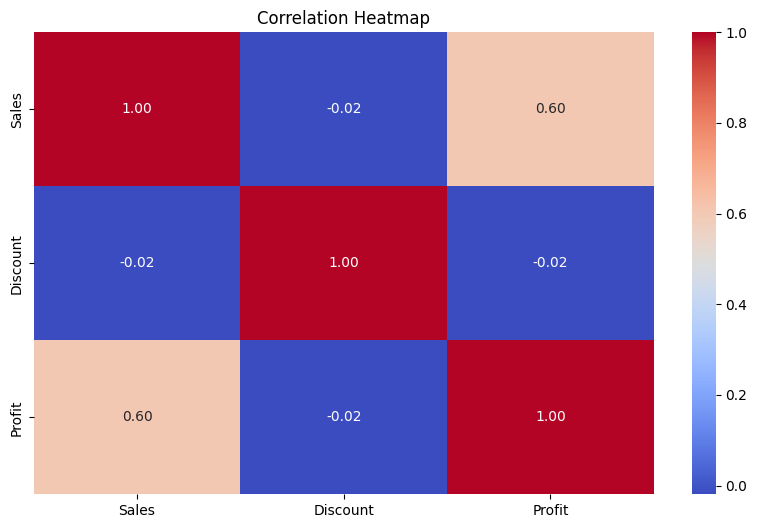

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()